In [1]:
import numpy as np
import matplotlib.pyplot as plt

import os
from os.path import join as join
import sys

module_path = os.path.abspath(os.path.join('..'))

if module_path not in sys.path :
    sys.path.append(module_path)

    
import _ressources.chain as chain
import _ressources.tools as tools
import _ressources.lumenclass as lc

from scipy.optimize import curve_fit

main_dir = '/Users/mathieuleverge/git/chain_lumen/_data/osmotic'

In [4]:
def lin(x, a, b) :
    return a*x+b

def fit_coeff(func, x_dat, y_dat) :
    x_dat_log, y_dat_log = x_dat, y_dat
    popt, pcov = curve_fit(func, x_dat_log, y_dat_log)
    return popt#, pcov

def average_powerlaw(a_list, k_list) :
    a_avg = np.average(a_list)
    k_avg = np.exp(np.average(k_list))
    return a_avg, k_avg

def load_config(N_dict, data_dir, ell, chis_list=[5, 50, 500], chiv_list=[5, 50, 500], nsim=20, color_list=color_list) :

    N_dict[ell] = {}
    c = 0

    for chis in chis_list :
        N_dict[ell][chis] = {}
        for chiv in chiv_list :
            N_dict[ell][chis][chiv] = {}
            N_dict[ell][chis][chiv]['color'] = color_list[c]
            for i in range(nsim) :
                try :
                    Nt = np.loadtxt(join(main_dir, data_dir, 'chis'+str(chis)+'_'+'chiv'+str(chiv), 'sim_nlum'+str(i).zfill(2)+'.dat'))
                    N_dict[ell][chis][chiv][i] = Nt
                except :
                    print(i)
                    pass
            print(chis, chiv, ' done !', end='\r')
            c += 1
    return N_dict

def plot_coarsening(N_dict, ell, chis_list=[5, 50, 500], chiv_list=[5, 50, 500], nsim=20, xlim=[]) :
    plt.figure(figsize=(8, 8))

    for chis in chis_list :
        #print(chis)
        for chiv in chiv_list :
            #print(chiv)
            has_legend = False
            for i in range(nsim) :
                try :
                    plt.xscale('log')
                    plt.yscale('log')
                    if has_legend :
                        plt.plot(N_dict[ell][chis][chiv][i][:, 0], N_dict[ell][chis][chiv][i][:, 1], color = N_dict[ell][chis][chiv]['color'])
                    else :
                        plt.plot(N_dict[ell][chis][chiv][i][:, 0], N_dict[ell][chis][chiv][i][:, 1], color = N_dict[ell][chis][chiv]['color'], label = r'$\chi_s = '+ str(chis) + ' ; \chi_v = ' + str(chiv) + '$')
                        has_legend = True
                except :
                    #print(chis, chiv, i, ' had problems...')
                    pass
    if len(xlim) > 0 :
        plt.xlim(xlim[0], xlim[1])
    plt.title(r'HO-coarsening of chain of N(0)=1000 for $\ell(0) = '+str(ell) + '$')
    plt.xlabel('Time [s]')
    plt.ylabel('N(t)')
    plt.legend(loc=3)
    plt.show()
    

    
    
def calc_mu(theta) :
    return np.sin(theta)**2 / (2*theta - np.sin(2*theta))

def calc_chi(theta, gamma, kappa, ell0, L0) :
    mu = calc_mu(theta)
    return 0.5*mu*np.sin(theta)*gamma*kappa / (ell0*L0**3)
    #return gamma*kappa / (ell0*L0**3)

def calc_chi(theta, eps, kappa, ell0, L0) :
    mu = calc_mu(theta)
    return 0.5*mu*np.sin(theta)*eps*kappa / (ell0*L0**3)
    #return mu*np.sin(theta)*eps / (L0*ell0**3)


def lin(x, a, b) :
    return a*x+b

def fit_lin(t, N) :
    x, y = np.log(t), np.log(N)
    popt, pcov = curve_fit(lin, x, y)
    alpha, kappa = popt[0], np.exp(popt[1])
    alpha_std, kappa_std = pcov[0, 0], np.exp(pcov[1, 1])
    return kappa, alpha#, kappa_std, alpha_std
    

In [9]:
def plot_osmotic(chis, chiv, path_list, plot_param_list, Nt_list) :
    label = False
    Nt_list[(chis, chiv)] = {}
    for n in range(nsim) :
        Nt_list[(chis, chiv)][n] = np.loadtxt(os.path.join(path_list[(chis, chiv)][n], 'sim_nlum.dat'))
        if label :
            plt.plot(Nt_list[(chis, chiv)][n][:, 0], Nt_list[(chis, chiv)][n][:, 1], color=plot_param_list[(chis, chiv)][0], marker=plot_param_list[(chis, chiv)][1], markersize=plot_param_list[(chis, chiv)][2], linewidth=plot_param_list[(chis, chiv)][3])
        else :
            label = True
            plt.plot(Nt_list[(chis, chiv)][n][:, 0], Nt_list[(chis, chiv)][n][:, 1], color=plot_param_list[(chis, chiv)][0], marker=plot_param_list[(chis, chiv)][1], markersize=plot_param_list[(chis, chiv)][2], linewidth=plot_param_list[(chis, chiv)][3], label = r'$\chi_s$ = '+ str(chis) + '$\chi_v = $' + str(chiv))
    return Nt_list[(chis, chiv)]


Import successful !


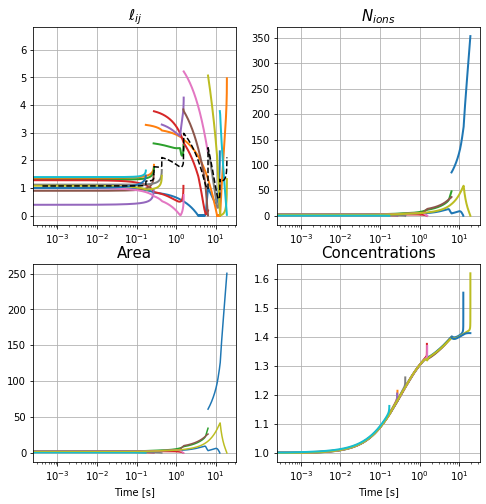

In [63]:
p = '/Users/mathieuleverge/git/chain_lumen/_data/osmotic/N100'
L, nions, pos = tools.load_file(os.path.join(p, 'sim_all.dat'))
ell = tools.load_brfile(os.path.join(p, 'sim_bridges.dat'))

savename = ''
show_area = 0
savefig = 0
x_log = 1
tools.plot_evolution(L, nions, ell, savename=savename, show_totalarea=show_area, savefig=savefig, x_logscale=x_log, figsize=(8, 8))


# $N(0) = 100$


In [12]:
ms = 5
lw = 1

plot_param_list = {(5, 5) : ['magenta', '+', ms, lw], 
                   (50, 50) : ['blue', '+', ms, lw], 
                   (500, 500) : ['green', '+', ms, lw], 
                   1e-2 : ['orange', '+', ms, lw], 
                   1e-3 :['red', '+', ms, lw], 
                   1e-4 :['purple', '+', ms, lw], 
                   1e-5 :['grey', '+', ms, lw]}

In [13]:
subdir = 'N100/'
nsim=5

path_list_N100 = {}

# chis = 5, chiv = 5
chis = 5
chiv = 5
path_list_N100[(chis, chiv)] = {}
for n in range(nsim) :
    subsubdir = 'chis_' + str(chis) + 'chiv_' + str(chiv)
    path_list_N100[(chis, chiv)][n] = os.path.join(main_dir, subdir, 'run'+str(n).zfill(4))
    
# chis = 50, chiv = 50
chis = 50
chiv = 50
path_list_N100[(chis, chiv)] = {}
for n in range(nsim) :
    subsubdir = 'chis_' + str(chis) + 'chiv_' + str(chiv)
    path_list_N100[(chis, chiv)][n] = os.path.join(main_dir, subdir, 'run'+str(n).zfill(4))
    
# chis = 500, chiv = 500
chis = 500
chiv = 500
path_list_N100[(chis, chiv)] = {}
for n in range(nsim) :
    subsubdir = 'chis_' + str(chis) + 'chiv_' + str(chiv)
    path_list_N100[(chis, chiv)][n] = os.path.join(main_dir, subdir, 'run'+str(n).zfill(4))
    

## $\chi_s = 5$,  $\chi_v = 5$

In [16]:
path_list_N100[(5, 5)]

{0: '/Users/mathieuleverge/git/chain_lumen/_data/osmotic/N100/run0000',
 1: '/Users/mathieuleverge/git/chain_lumen/_data/osmotic/N100/run0001',
 2: '/Users/mathieuleverge/git/chain_lumen/_data/osmotic/N100/run0002',
 3: '/Users/mathieuleverge/git/chain_lumen/_data/osmotic/N100/run0003',
 4: '/Users/mathieuleverge/git/chain_lumen/_data/osmotic/N100/run0004'}

In [17]:
Nt_list_N100 = {}

chis5_chiv5 = 1

if chis5_chiv5 :
    chis = 5
    chiv = 5
    Nt_list_N100[(chis, chiv)] = plot_osmotic(chis, chiv, path_list_N100, plot_param_list, Nt_list_N100)

OSError: /Users/mathieuleverge/git/chain_lumen/_data/osmotic/N100/run0000/sim_nlum.dat not found.

# $L(0) = 1$

In [9]:
ell = 1
data_dir = 'ell'+str(ell)

N_dict = load_config(N_dict, data_dir=data_dir, ell=ell)

80 5  done !!
9
10
11
12
13
14
15
16
17
18
19
00 50  done !
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
000 50  done !
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


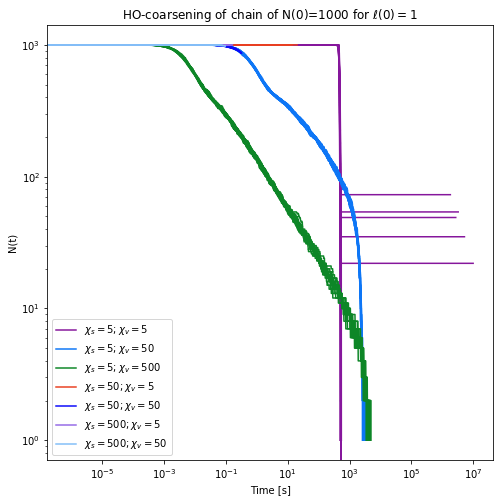

In [10]:
ell=1
plot_coarsening(N_dict, ell=ell, chis_list=[5, 50, 500], chiv_list=[5, 50, 500])


# $L(0) = 10$

In [5]:
ell = 10
data_dir = 'ell'+str(ell)

N_dict = load_config(N_dict, data_dir=data_dir, ell=ell)

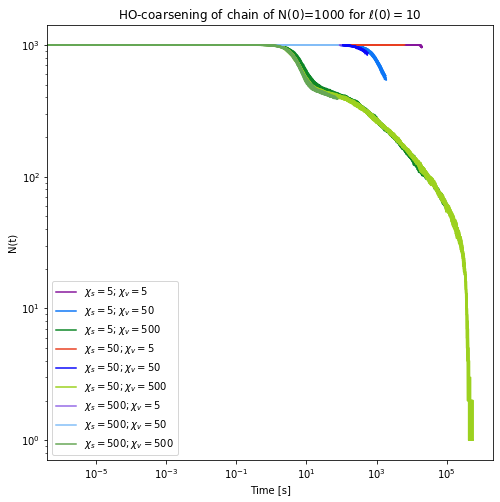

In [6]:
ell=10
plot_coarsening(N_dict, ell=ell, chis_list=[5, 50, 500], chiv_list=[5, 50, 500])


# $L(0)=100$

In [7]:
ell = 100
data_dir = 'ell'+str(ell)

N_dict = load_config(N_dict, data_dir=data_dir, ell=ell)

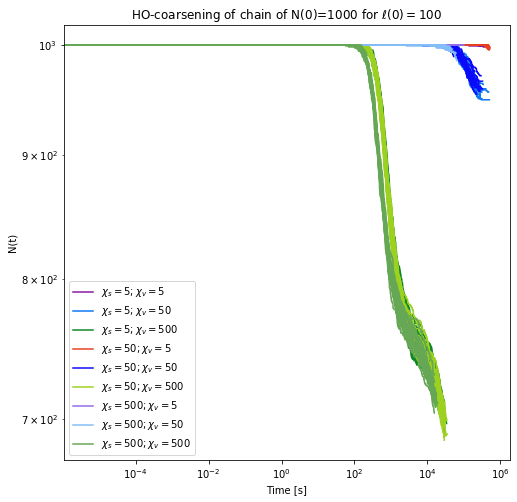

In [8]:
ell=100
plot_coarsening(N_dict, ell=ell, chis_list=[5, 50, 500], chiv_list=[5, 50, 500])


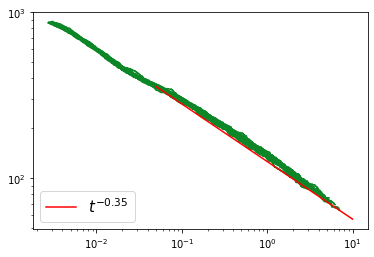

In [15]:
a_list, k_list = [], []
fit_start, fit_end = 1000, -10000

tmin, tmax = 1., 1.

plt.xscale('log')
plt.yscale('log')

chis, chiv = 5, 500

nsim = 20
for i in range(nsim) :
    x_dat = N_dict[1][chis][chiv][i][fit_start:fit_end, 0]
    #if np.min(x_dat) < tmin :
    #    tmin = np.min(x_dat)
    #if np.max(x_dat) > tmax :
    #    tmax = np.max(x_dat)
        
    y_dat = N_dict[1][chis][chiv][i][fit_start:fit_end, 1]
    plt.plot(x_dat[fit_start:fit_end], y_dat[fit_start:fit_end], color = N_dict[1][chis][chiv]['color'])
    
    popt, pcov = curve_fit(lin, np.log(x_dat), np.log(y_dat))
    a_list += [popt[0]]
    k_list += [popt[1]]

tmin, tmax = .05, 10.
t = np.linspace(tmin, tmax, 101)

#a, k = average_powerlaw(a_list, k_list)
k, a = np.exp(np.average(k_list)), np.average(a_list)
plt.plot(t, k*t**a, label = r'$t^{'+"{:2.2f}".format(a)+'}$', color='r')

plt.legend(loc=3, fontsize=15)
plt.show()
